In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
def load_mnist(pth):
    X_train = pd.read_csv(os.path.join(pth, 'mnist_train.csv'))
    X_test = pd.read_csv(os.path.join(pth, 'mnist_test.csv'))
    y_train = X_train['label']
    y_test = X_test['label']
    X_train = X_train.drop('label', axis=1)
    X_test = X_test.drop('label', axis=1)
    return X_train/255, X_test/255, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = load_mnist('data')

In [7]:
# umap
import umap.umap_ as umap
reducer = umap.UMAP()
print('Fitting umap manifold projection')
reducer.fit(np.concatenate((X_train, X_test), axis=0), 
            np.concatenate((y_train, y_test), axis=0))
Xtr_umap, Xte_umap = reducer.transform(X_train), reducer.transform(X_test)

Fitting umap manifold projection


/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Text(0.5, 1.0, 'MNIST data embedded into two dimensions by UMAP')

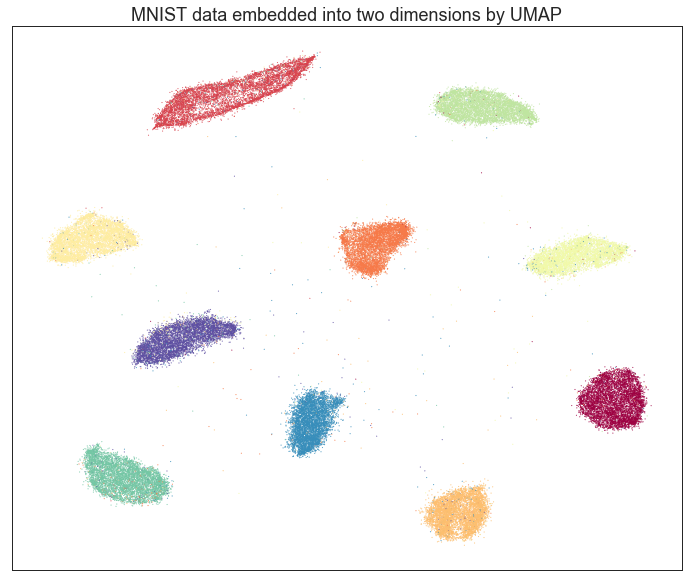

In [9]:
# visualize UMAP
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context='paper', style='white')
fig, ax = plt.subplots(figsize=(12, 10))
color = y_train
plt.scatter(
    Xtr_umap[:, 0], Xtr_umap[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

In [13]:
#tsne
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=4)
bigX = tsne.fit_transform(X=np.concatenate((X_train, X_test), axis=0))
Xtr_tsne, Xte_tsne = bigX[:60000], bigX[60000:]

Text(0.5, 1.0, 'MNIST data embedded into two dimensions by UMAP')

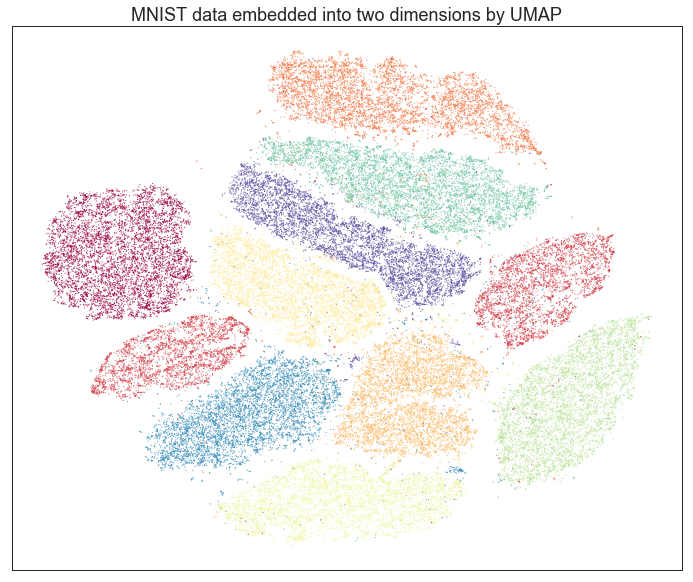

In [14]:
sns.set(context='paper', style='white')
fig, ax = plt.subplots(figsize=(12, 10))
color = y_train
plt.scatter(
    Xtr_tsne[:, 0], Xtr_tsne[:, 1], c=color, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train = np.concatenate((Xtr_umap, Xtr_tsne), axis=1)
X_test = np.concatenate((Xte_umap, Xte_tsne), axis=1)
assert X_train.shape == (60000,4)
model = SVC(kernel='rbf', C=10, verbose=True)
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True)

In [20]:
pred = model.predict(X_test)

In [21]:
accuracy_score(y_test, pred)

0.9757

In [22]:
# memes
from xgboost import XGBClassifier
model2 = XGBClassifier(n_estimators=500, verbosity=1, n_jobs=4, learning_rate=0.01)

In [24]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=4, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [25]:
pred = model2.predict(X_test)

In [26]:
accuracy_score(y_test, pred)

0.9802

TypeError: fit_transform() missing 1 required positional argument: 'X'